In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os,sys
#import csv
import pandas as pan
import cPickle as pickle
import pprint
#import glob
#import tables  #PyTables used to generate HDF5 file instead of pickle

%matplotlib inline

Companies House data set used as a list of source companies which could be of interest for B2B lead generation.
Obtain the data set here:
http://download.companieshouse.gov.uk/en_output.html

First we read the data set into a Pandas DataFrame and serialise it into a pickle file.

In [2]:
rootdir="/home/ilan/Desktop/GI_interview_project"
datadir="/home/ilan/Desktop/GI_interview_project/company_data"

os.chdir(datadir)

pklfile="data.pkl"
#hffile="data.h5"
folderpath=os.path.join(datadir,pklfile)
#folderpath=os.path.join(rootdir,hffile)
if (os.path.exists(folderpath)==True):
    print("Pickle file containing data found. Loading it...")
    data=pickle.load(open(folderpath,'r'))
    #data = tables.open_file(folderpath, driver="H5FD_CORE")
else:
    print("Reading in csv file and creating pickle...")
    filenames =['BasicCompanyData-2015-05-01-part1_5.csv', 'BasicCompanyData-2015-05-01-part2_5.csv',\
            'BasicCompanyData-2015-05-01-part3_5.csv', 'BasicCompanyData-2015-05-01-part4_5.csv',\
            'BasicCompanyData-2015-05-01-part5_5.csv']
    list_ = []
#    for i,j in enumerate(filenames):
#        if (i == 0):
#            data = pan.read_csv(j, delimiter=',',index_col=False)
#            list_.append(data)
#            print data.head(1)
#        elif (i > 0):
#            data = pan.read_csv(j, delimiter=',',skiprows=1,index_col=False)
#            list_.append(data)
#            print data.head(1)
#    data = pan.concat(list_)
    for i in filenames:
        data = pan.read_csv(i, delimiter=',',index_col=False)
        list_.append(data)
        #print data.head(1)
    data = pan.concat(list_)
    # Remove dots and whitespaces from column titles
    colnames = [str(i).replace('.','_').strip() for i in list(data.columns.values)]
    data.columns=colnames
    # Remove period in the label column
    #data['Label']=data['Label'].apply(lambda x: x.strip('.'))
    with open(pklfile,'wb') as output:
        pickle.dump(data, output, pickle.HIGHEST_PROTOCOL)

os.chdir(rootdir)
        
data

Pickle file containing data found. Loading it...


,CompanyName,CompanyNumber,RegAddress_CareOf,RegAddress_POBox,RegAddress_AddressLine1,RegAddress_AddressLine2,RegAddress_PostTown,RegAddress_County,RegAddress_Country,RegAddress_PostCode,...,PreviousName_6_CONDATE,PreviousName_6_CompanyName,PreviousName_7_CONDATE,PreviousName_7_CompanyName,PreviousName_8_CONDATE,PreviousName_8_CompanyName,PreviousName_9_CONDATE,PreviousName_9_CompanyName,PreviousName_10_CONDATE,PreviousName_10_CompanyName
0,! LTD,08209948,NaN,NaN,METROHOUSE 57 PEPPER ROAD,HUNSLET,LEEDS,YORKSHIRE,NaN,LS10 2RU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,!BIG IMPACT GRAPHICS LIMITED,07382019,NaN,NaN,335 ROSDEN HOUSE,372 OLD STREET,LONDON,NaN,NaN,EC1V 9AV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,!K7 TOURING LIMITED,08937297,C/O THE GREENE PARTNERSHIP LLP,NaN,10TH FLOOR MAPLE HOUSE,HIGH STREET,POTTERS BAR,HERTFORDSHIRE,NaN,EN6 5BA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,!NFERNO LTD.,04753368,NaN,NaN,FIRST FLOOR THAVIES INN HOUSE 3-4,HOLBORN CIRCUS,LONDON,NaN,NaN,EC1N 2HA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,!NSPIRED LTD,SC421617,NaN,NaN,12 BON ACCORD SQUARE,NaN,ABERDEEN,NaN,NaN,AB11 6DJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,!NVERTD DESIGNS LIMITED,09152972,NaN,NaN,32 RECTORY ROAD,NaN,STEPPINGLEY,NaN,UNITED KINGDOM,MK45 5AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,!OBAC LIMITED,FC031362,NaN,NaN,1ST AND 2ND FLOORS ELIZABETH HOUSE,LES RUETIES BRAYES,ST PETER PORT,GY1 1EW,GUERNSEY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,!OBAC UK LIMITED,07687209,NaN,NaN,ENDEAVOUR HOUSE,COOPERS END ROAD,STANSTED AIRPORT,NaN,NaN,CM24 1SJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,!YOZO FASS LIMITED,02714021,NaN,NaN,1 VERONICA HOUSE,WICKHAM ROAD,BROCKLEY,NaN,NaN,SE4 1NQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"""1 C O LIMITED""",03811958,NaN,NaN,FANE COURT,GREEN ROAD SHIPBOURNE,TONBRIDGE,KENT,NaN,TN11 9PL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To get a feel for the data set we do some basic data set exploration.

In [3]:
print data.columns
print data.size
data.describe()

Index([u'CompanyName', u'CompanyNumber', u'RegAddress_CareOf', u'RegAddress_POBox', u'RegAddress_AddressLine1', u'RegAddress_AddressLine2', u'RegAddress_PostTown', u'RegAddress_County', u'RegAddress_Country', u'RegAddress_PostCode', u'CompanyCategory', u'CompanyStatus', u'CountryOfOrigin', u'DissolutionDate', u'IncorporationDate', u'Accounts_AccountRefDay', u'Accounts_AccountRefMonth', u'Accounts_NextDueDate', u'Accounts_LastMadeUpDate', u'Accounts_AccountCategory', u'Returns_NextDueDate', u'Returns_LastMadeUpDate', u'Mortgages_NumMortCharges', u'Mortgages_NumMortOutstanding', u'Mortgages_NumMortPartSatisfied', u'Mortgages_NumMortSatisfied', u'SICCode_SicText_1', u'SICCode_SicText_2', u'SICCode_SicText_3', u'SICCode_SicText_4', u'LimitedPartnerships_NumGenPartners', u'LimitedPartnerships_NumLimPartners', u'URI', u'PreviousName_1_CONDATE', u'PreviousName_1_CompanyName', u'PreviousName_2_CONDATE', u'PreviousName_2_CompanyName', u'PreviousName_3_CONDATE', u'PreviousName_3_CompanyName', u'

,DissolutionDate,Accounts_AccountRefDay,Accounts_AccountRefMonth,Mortgages_NumMortCharges,Mortgages_NumMortOutstanding,Mortgages_NumMortPartSatisfied,Mortgages_NumMortSatisfied,LimitedPartnerships_NumGenPartners,LimitedPartnerships_NumLimPartners
count,0,3565670.000000,3565670.000000,3611077.000000,3611077.000000,3611077.000000,3611077.000000,3611077.000000,3611077.000000
mean,NaN,30.261290,6.351142,0.715750,0.446035,0.000648,0.268702,0.009763,0.032917
std,NaN,2.639808,3.621669,9.078691,7.347536,0.072631,4.631352,0.142520,1.336482
min,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000
25%,NaN,30.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,31.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,31.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,NaN,31.000000,12.000000,6121.000000,6121.000000,81.000000,5720.000000,110.000000,823.000000


Private Limited Company                                         3340497
PRI/LTD BY GUAR/NSC (Private, limited by guarantee, no share capital)      88475
Limited Liability Partnership                                     60148
PRI/LBG/NSC (Private, Limited by guarantee, no share capital, use of 'Limited' exemption)      42215
Limited Partnership                                               32777
Other company type                                                11724
Community Interest Company                                        10724
Industrial and Provident Society                                  10108
Public Limited Company                                             7507
Private Unlimited Company                                          4914
Royal Charter Company                                               850
Investment Company with Variable Capital                            547
Private Unlimited                                                   234
Registered Society        

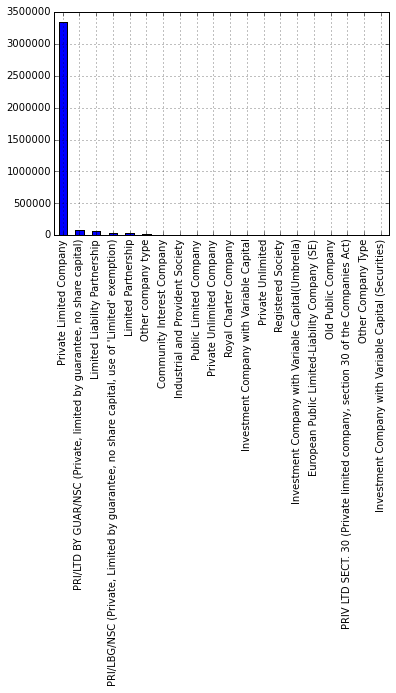

In [4]:
# All the labels in the data, and their counts
categorycounts=data['CompanyCategory'].value_counts()
print categorycounts
categorycounts.plot(kind='bar')

Active                                              3366544
Active - Proposal to Strike off                      154723
Liquidation                                           80033
In Administration                                      3467
Live but Receiver Manager on at least one charge       2390
Voluntary Arrangement                                  1649
ADMINISTRATIVE RECEIVER                                1335
In Administration/Administrative Receiver               356
RECEIVERSHIP                                            268
ADMINISTRATION ORDER                                    156
RECEIVER MANAGER / ADMINISTRATIVE RECEIVER               80
In Administration/Receiver Manager                       66
VOLUNTARY ARRANGEMENT / RECEIVER MANAGER                  8
In Administration/Receivership                            1
VOLUNTARY ARRANGEMENT / ADMINISTRATIVE RECEIVER           1
dtype: int64


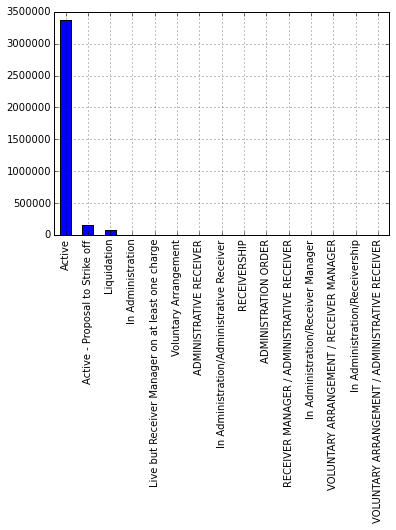

In [5]:
# All the labels in the data, and their counts
statuscounts=data['CompanyStatus'].value_counts()
print statuscounts
statuscounts.plot(kind='bar')

In [6]:
class Mask(object):
    def __init__(self,df,field,match):
        self.df = df
        self.field = field
        self.match = match
        self.function = lambda x, y, z: x.loc[x[y] == z]
    def __call__(self):
        return self.function(self.df,self.field,self.match)
        #return self.df.loc[self.df[self.field] == self.match]
        

#data[data.CompanyName == "! LTD"]
#data.loc[data["CompanyName"] == "! LTD"]
result = Mask(data, "CompanyName", "! LTD")
print result()

  CompanyName CompanyNumber RegAddress_CareOf RegAddress_POBox  \
0       ! LTD      08209948               NaN              NaN   

     RegAddress_AddressLine1 RegAddress_AddressLine2 RegAddress_PostTown  \
0  METROHOUSE 57 PEPPER ROAD                 HUNSLET               LEEDS   

  RegAddress_County RegAddress_Country RegAddress_PostCode  \
0         YORKSHIRE                NaN            LS10 2RU   

              ...             PreviousName_6_CONDATE  \
0             ...                                NaN   

  PreviousName_6_CompanyName PreviousName_7_CONDATE  \
0                        NaN                    NaN   

   PreviousName_7_CompanyName PreviousName_8_CONDATE  \
0                         NaN                    NaN   

   PreviousName_8_CompanyName  PreviousName_9_CONDATE  \
0                         NaN                     NaN   

  PreviousName_9_CompanyName PreviousName_10_CONDATE  \
0                        NaN                     NaN   

  PreviousName_10_Compan

In [7]:
class booleanMask(object):
    def __init__(self,function):
        self.function = function
    #def __and__(self,other):
    #    self.function = self.function & other.function
    def __call__(self,df):
        self.df = df
        return map(self.function, [self.df])[0]
    
company_mask = booleanMask(lambda x: x.CompanyName == "! LTD")
##print company_mask(data)
print data[company_mask(data)]


# MASKS CAN NOW BE COMBINED
#uk_mask = booleanMask(lambda x: x.RegAddress_Country == "UNITED KINGDOM")
#active_mask = booleanMask(lambda x: x.CompanyStatus == "Active")
#print data[uk_mask(data) & active_mask(data)]

# FOR VALIDATION TO MAKE SURE BOOLEANMASK IS GIVING WHAT WE EXPECT
#data.loc[(data["RegAddress_Country"] == "UNITED KINGDOM") & (data["CompanyStatus"] == "Active")]
#print len(data.loc[(data["RegAddress_Country"] == "UNITED KINGDOM") & (data["CompanyStatus"] == "Active")])
#print len(data[uk_mask(data) & active_mask(data)])
#print map(lambda x: x.CompanyName == "! LTD", [data])

  CompanyName CompanyNumber RegAddress_CareOf RegAddress_POBox  \
0       ! LTD      08209948               NaN              NaN   

     RegAddress_AddressLine1 RegAddress_AddressLine2 RegAddress_PostTown  \
0  METROHOUSE 57 PEPPER ROAD                 HUNSLET               LEEDS   

  RegAddress_County RegAddress_Country RegAddress_PostCode  \
0         YORKSHIRE                NaN            LS10 2RU   

              ...             PreviousName_6_CONDATE  \
0             ...                                NaN   

  PreviousName_6_CompanyName PreviousName_7_CONDATE  \
0                        NaN                    NaN   

   PreviousName_7_CompanyName PreviousName_8_CONDATE  \
0                         NaN                    NaN   

   PreviousName_8_CompanyName  PreviousName_9_CONDATE  \
0                         NaN                     NaN   

  PreviousName_9_CompanyName PreviousName_10_CONDATE  \
0                        NaN                     NaN   

  PreviousName_10_Compan

In [8]:
# DEFINE A REDUCED DATASET FOR PROTOTYPING
from random import sample
# number/fraction of entries to use
#ents = int(len(X)*0.1)
ents = 100
# Take a random sample from the data
smalldataind = sample(range(0,len(data)-1),ents)
#print smalldataind

# HERE
#smalldataind = [784400, 333248, 3037529, 333413, 1851904, 1569996, 2958604, 769824, 2848095, 896580]

smalldata = data.iloc[smalldataind]
smalldata

,CompanyName,CompanyNumber,RegAddress_CareOf,RegAddress_POBox,RegAddress_AddressLine1,RegAddress_AddressLine2,RegAddress_PostTown,RegAddress_County,RegAddress_Country,RegAddress_PostCode,...,PreviousName_6_CONDATE,PreviousName_6_CompanyName,PreviousName_7_CONDATE,PreviousName_7_CompanyName,PreviousName_8_CONDATE,PreviousName_8_CompanyName,PreviousName_9_CONDATE,PreviousName_9_CompanyName,PreviousName_10_CONDATE,PreviousName_10_CompanyName
175175,EARO ESTATES LTD,09480942,NaN,NaN,4 MELTON ROAD,NaN,MANCHESTER,NaN,ENGLAND,M8 4HG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207052,AMERICAN EXPRESSO LIMITED,04255922,NaN,NaN,SUITE 100,THE STUDIO ST NICHOLAS CLOSE,ELSTREE,HERTFORDSHIRE,NaN,WD6 3EW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390136,SIXTEEN25,08230187,NaN,NaN,10 DENMARK STREET,NaN,LONDON,NaN,NaN,WC2H 8LS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38519,DATASAFE SERVICES LIMITED,01999773,NaN,NaN,UNITED HOUSE,NORTH ROAD,LONDON,NaN,NaN,N7 9DP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354624,BALLYNARIS LTD,NI621115,NaN,NaN,55 MILEBUSH ROAD,NaN,DROMORE,CO. DOWN,NaN,BT25 1RU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
533389,SUBSEA INSPECTION SW LTD,09156040,NaN,NaN,TIMBERLY,SOUTH STREET,AXMINSTER,DEVON,UNITED KINGDOM,EX13 5AD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446674,SOUTHWOOD BUILDING CONTRACTORS LIMITED,06389143,NaN,NaN,UNIT 16 ENDEAVOUR BUSINESS PARK,CROW ARCH LANE,RINGWOOD,HAMPSHIRE,NaN,BH24 1PN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471345,MISS B CREATIVE LIMITED,07248291,NaN,NaN,470 HUCKNALL ROAD,NaN,NOTTINGHAM,NOTTINGHAMSHIRE,NaN,NG5 1FX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249166,S D C CONSULTANCY SERVICES LIMITED,06767060,NaN,NaN,39 WHITE CLOVER SQUARE,NaN,LYMM,CHESHIRE,NaN,WA13 0RX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245418,APPLECORE DEVELOPMENTS LIMITED,04183144,NaN,NaN,PORTWAY HILL HOUSE,PORTWAY HILL,BATCOMBE,SOMERSET,NaN,BA4 6BR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#  svn checkout http://pygoogle.googlecode.com/svn/trunk pygoogle-read-only
#  python setup.py build
#  sudo python setup.py install

from pygoogle import pygoogle
from time import sleep
from pprint import pprint
#g = pygoogle('! LTD company')
#g.pages = 1
#print '*Found %s results*'%(g.get_result_count())
#g.get_urls()

#print list(smalldata['CompanyName'].values)
compnames = list(smalldata['CompanyName'].values)
#compadds = list(smalldata['RegAddress_AddressLine1'].values)
compadds = list(smalldata['RegAddress_PostCode'].values)
#compadds = [i.split(' ')[0] for i in list(smalldata['RegAddress_PostCode'].values)]


#urls = []
#counter = 0
#for i,j in zip(compnames,compadds):
#    g = pygoogle(i+' contact '+j)
#    g.pages = 1
#    urls.append(g.get_urls())
#    counter += 1
#    sleep(np.random.uniform(5,10))
#print urls

os.chdir(datadir)

urlpklfile="URLs.pkl"
urlfolderpath=os.path.join(datadir,urlpklfile)
if (os.path.exists(urlfolderpath)==True):
    print("Pickle file containing URL data found. Loading it...")
    urls=pickle.load(open(urlfolderpath,'r'))
else:
    print("Fetching company URLs from Google...")
    urls = []
    counter = 0
    for i,j in zip(compnames,compadds):
        g = pygoogle(i+' contact '+j)
        g.pages = 1
        urls.append(g.get_urls())
        if (counter % 10 == 0):
            with open(urlpklfile,'wb') as output:
                pickle.dump(urls, output, pickle.HIGHEST_PROTOCOL)
        counter += 1
        sleep(np.random.uniform(5,10))
    with open(urlpklfile,'wb') as output:
        pickle.dump(urls, output, pickle.HIGHEST_PROTOCOL)

os.chdir(rootdir)

        
#urls = [[u'https://www.facebook.com/andrea.shaw.564', u'https://www.facebook.com/dianne.schultz1', u'http://www.192.com/atoz/business/brentwood/financial--advisers--(independent)/', u'https://classictvhistory.wordpress.com/tag/have-gun-will-travel/', u'http://i.dujour.com/december-print/', u'http://www.greenvillecountybar.org/Gbar_News_PDF/2014/122014.pdf', u'http://dartmouthalumnimagazine.com/class-notes/1970/all', u'http://www.dls.org/pdf/magazine/october_2007_magazine.pdf'], [u'http://www.city-data.com/clackamas-county/D/Delenka-Lane-2.html', u'http://law.justia.com/cases/alaska/supreme-court/2011/', u'https://www.facebook.com/htmody', u'https://www.facebook.com/terry.meyers.5', u'http://www.ciwf.com/media/1141326/outofsight-full-report.pdf', u'http://www.losfoundation.org/wp-content/uploads/2013/06/Donors-2011_2012.pdf', u'http://svcf.org/help/recognition/', u'https://www.ipo.gov.uk/t-tmj/tm-journals/2015-007/owner.html'], [u'https://www.sc.com/uk/contact-us/', u'https://www.sc.com/en/contact-us/', u'https://www.sc.com/je/contact-us/index.html', u'https://www.sc.com/hk/investor-relations/_documents/en/news/20130905d.pdf', u'http://www.aim25.ac.uk/cgi-bin/vcdf/detail?coll_id=18442&inst_id=118&nv1=search&nv2=', u'http://www.bloomberg.com/research/stocks/people/person.asp?personId=8307423&ticker=STAN:LN', u'http://www.hkexnews.hk/listedco/listconews/sehk/2015/0519/LTN20150519338.pdf', u'http://www.sebi.gov.in/dp/stdchtdrhp.pdf'], [u'https://www.facebook.com/theoldglovefactorymarketplace', u'https://www.grinnell.edu/about/visit/spaces/old-glove-factory', u'http://en.wikipedia.org/wiki/GlaxoSmithKline', u'http://www.dailykos.com/story/2013/01/06/1163848/-KosAbility-Trying-to-Clean-Out-an-Old-House-with-Arthritis-and-Asthma', u'http://www.cdc.gov/NCEH/publications/books/housing/cha05.htm', u'http://www.slideshare.net/MedlineIndustriesInc/surgical-gloves-a-comprehensive-guide', u'http://www.cpsc.gov/pagefiles/112284/5015.pdf', u'http://ftp.asahq.org/publicationsAndServices/latexallergy.pdf'], [u'http://www.thegsa.co.za/index.php?nav=destination_country&view=28', u'https://www.facebook.com/anna.brass1'], [], [u'http://books.openedition.org/obp/326', u'http://www.hrblock.com/tax-offices/local-offices/#!/en/office-profile/12546', u'http://www.caicv.org/dev/data/fckeditor/cms/file/Quorum_July2010WEB.pdf', u'https://play.google.com/store/apps/details?id=com.mhriley.spendingtracker&hl=en', u'https://www.facebook.com/walter.kajer.1', u'http://duchyofcornwall.org/assets/images/documents/Poundbury_Factsheet_2013.pdf', u'http://www.lihp.org/Content/2011 annual report.pdf', u'http://www.kildare.ie/business/directory/list-companies.asp?Category=Business Services'], [u'http://cera.govt.nz/sites/default/files/common/tc3-residential-rebuild-booklet-A4-20121204.pdf', u'http://www.thomsonlocal.com/Funeral-Directors/in/Surrey/', u'http://www.britishculinaryfederation.co.uk/bcf/wp-content/uploads/2011/06/091124_Culinary_News_December_v6.pdf', u'http://www.hackney.gov.uk/Assets/Documents/ht276.pdf', u'http://www.insightpublications.com.au/pdf_preview/isp-julius-caesar-10-pages.pdf', u'http://www.tripadvisor.co.uk/Hotel_Review-g191252-d491974-Reviews-Trimstone_Manor_Country_House_Hotel-Ilfracombe_Devon_England.html', u'http://www.lincoln.ac.nz/Documents/LEaP/WMK ICRF Final May 2013.pdf', u'http://delvinvillage.com/directory/'], [u'http://www.deloitte.com/', u'http://www.schencksc.com/2015rpctour/', u'http://www.schencksc.com/2013recforum/', u'https://www.linkedin.com/in/jeffreyshlefstein', u'http://www.aicpa.org/BecomeACPA/Pages/InternshipsandCooperativePrograms.aspx', u'http://www.freshbooks.com/accountants/map', u'http://www.mncpa.org/find-a-cpa/cpa-yellow-pages/list.aspx?l=c', u'http://cdn.colorado.gov/cs/Satellite?blobcol=urldata&blobheadername1=Content-Disposition&blobheadername2=Content-Type&blobheadervalue1=inline;+filename="March+28,+2007+Board+Meeting+Minutes.pdf"&blobheadervalue2=application/pdf&blobkey=id&blobtable=MungoBlobs&blobwhere=1251832310203&ssbinary=true'], []]
#urls =[[u'http://www.192.com/atoz/business/brentwood/financial--advisers--(independent)/', u'http://www.ucl.ac.uk/consultants/homepage'], [u'http://www.contactps.ca/', u'https://411.ca/business/profile/7759616'], [u'https://www.sc.com/en/contact-us/', u'https://www.sc.com/', u'https://www.sc.com/je/contact-us/index.html', u'https://www.sc.com/hk/investor-relations/_documents/en/news/20090902a.pdf', u'http://www.sebi.gov.in/dp/stdchtdrhp.pdf', u'http://www.bloomberg.com/research/stocks/people/person.asp?personId=8307423&ticker=STAN:LN', u'http://vpr.hkma.gov.hk/pdf/100269/fd_int/fd_int_0613_pt01.pdf', u'http://www.fogl.com/fogl/uploads/companypresentations/annual_report_2012.pdf'], [], [u'https://openaccess.adb.org/bitstream/handle/11540/1651/Volume 28_No 2_2011_06.pdf?sequence=1', u'http://yourtireshopsupply.com/manufacturer/27/grey-pneumatic-corp', u'https://www.facebook.com/people/\xe0\xb8\xa8\xe0\xb8\xb4\xe0\xb8\xa3\xe0\xb8\xb4\xe0\xb8\xa3\xe0\xb8\xb1\xe0\xb8\x95\xe0\xb8\x99\xe0\xb9\x8c-\xe0\xb8\x97\xe0\xb8\xa7\xe0\xb8\xb4\xe0\xb8\xa7\xe0\xb8\xb1\xe0\xb8\x92\xe0\xb8\x99\xe0\xb9\x8c/100004117395751', u'https://th-th.facebook.com/donnapa.apple', u'https://www.facebook.com/sasesopit.muttamara', u'https://th-th.facebook.com/KLShopbymarie', u'https://th-th.facebook.com/soraya.lomsungnoen.1', u'https://th-th.facebook.com/namthip.bunthong.7'], [u'http://agra-alliance.org/download/53396d7f2a934/', u'https://www.africare.org/wp-content/uploads/2014/08/AFSRNo4_BrysonEley_SuccessStoryGuide_Final_Jan7_2008_updated_June08.pdf'], [u'https://www.clearbooks.co.uk/directory/business', u'https://www.tapa.co.uk/the-tapa-opt-out-ledger.php', u'http://www.dailymail.co.uk/health/article-1330839/Blundering-doctors-leave-mother-terrified-falsely-diagnosing-brain-haemorrhage.html'], [u'http://www.priorygroup.com/location-results/item/the-priory-hospital-glasgow', u'http://www.yell.com/biz/1st-choice-plumbing-and-heating-glasgow-901468909/', u'https://www2.deloitte.com/content/dam/Deloitte/global/Documents/Consumer-Business/gx-cb-global-powers-of-retailing.pdf', u'http://www.rightmove.co.uk/property-for-sale/property-30497721.html', u'http://www.hazelwood.glasgow.sch.uk/', u'https://plus.google.com/+Paranetuklimited', u'http://www.kinningparkcomplex.org/projects-overview/bike-project/', u'https://www.glasgow.gov.uk/CHttpHandler.ashx?id=14911&p=0'], [u'http://www.scleeaccountant.com/', u'http://www.192.com/places/sk/sk8-1/sk8-1nq/', u'https://www.icpas.org/hc-career-center.aspx?id=21550', u'https://www.linkedin.com/pub/leona-crouch/26/b42/b17', u'http://www.burkertvaluation.com/wp-content/uploads/2014/04/Rpb-Vitae_General.pdf', u'http://www.alec.co.uk/cvtips/examgrcv.htm', u'http://www.chaos.umd.edu/misc/origplates.html', u'http://www.atiner.gr/bio/Syrrakos.doc'], [u'https://uk.linkedin.com/pub/david-wasilewski/27/143/368']]


# TO USE A HAND-PICKED SET OF URLS TO AVOID REPEAT REQUESTS TO GOOGLE, WHICH GET YOU BLOCKED
urls = [[u'http://www.192.com/atoz/business/brentwood/financial--advisers--(independent)/'], [u'http://www.plantmethods.com/content/10/October/2014', u'http://www.plantmethods.com/content?page=2&itemsPerPage=25'], [u'https://www.sc.com/uk/contact-us/', u'https://www.sc.com/en/contact-us/', u'https://www.sc.com/je/contact-us/index.html', u'https://www.sc.com/hk/investor-relations/_documents/en/news/20130905d.pdf', u'https://www.sc.com/hk/investor-relations/_documents/en/news/20140520b.pdf', u'http://www.bloomberg.com/research/stocks/people/person.asp?personId=8307423&ticker=STAN:LN', u'http://www.sebi.gov.in/dp/stdchtdrhp.pdf', u'http://www.hkexnews.hk/listedco/listconews/sehk/2015/0519/LTN20150519338.pdf'], [u'http://www.nhs.uk/Services/Trusts/Pharmacies/DefaultView.aspx?id=89768', u'http://www.boots.com/'], [], [], [u'https://www.xero.com/', u'http://www.sage.com/'], [u'http://www.mastercard.us/', u'http://www.baxterstorey.co.uk/'], [u'http://www.192.com/places/sk/sk8-1/sk8-1nq/', u'http://www.ey.com/', u'http://www.grantthornton.com/'], []]


#print len(urls)
#pprint(urls)

#filteredurls = urls[:]
#for count,i in enumerate(filteredurls[:]):
#    for j in i:
#        print j
#        if ('contact' not in j):
#            filteredurls[count].remove(j)
#            print "NOT FOUND"
            #print j
            #print filteredurls[count]
#print filteredurls

# This one exceeds maximum recursion
#def empty(seq):
#    try:
#        return all(map(empty, seq))
#    except TypeError:
#        return False

def empty(seq):
    """Check if a nested list (list of lists) is completely empty, if so return 'True'"""
    containslist = []
    for i in range(0,len(seq)-1):
        if seq[i]:
            containslist.append(False)
        else:
            containslist.append(True)
    if (False in containslist):
        return False
    else:
        return True

def filtering(initem):
    """ Check if string 'contact' is in URL, if so split by it and keep first part, else return empty list"""
    if ('contact' in initem):
        return initem.split('contact')[0]
    else:
        return []
    
filteredurls = [np.nan]*len(urls)
for i in range(0,len(urls)-1):
    filteredurls[i] = [filtering(j) for j in urls[i]]
    if empty(filteredurls[i]):
    #if not filteredurls[i]:
        filteredurls[i] = np.nan
#pprint(filteredurls)

#filteredurls = urls[:]
#for i,j in enumerate(urls):
#    toremove = [k for k in urls[i] if 'contact' not in urls[i]]
#    for l in j:
#        if(j in toremove):
#            filteredurls[i].remove(j)
#print filteredurls

d = {'CompanyName' : pan.Series(compnames), 'CompanyAddress1' : pan.Series(compadds), 'URLs' : pan.Series(filteredurls)}

dfurls = pan.DataFrame(d)
dfurls

#urls = [pygoogle(i).get_urls()[0] for i in list(smalldata['CompanyName'].values)]
#print urls
#smalldata['WebURL'] = Series([pygoogle(i).get_urls()[0] for i in data['CompanyName']], index=smalldata.index)
#compnames = smalldata.iterrows()[1]
#print compnames


#for i in range(0,len(smalldata)-1):


Pickle file containing URL data found. Loading it...


,CompanyAddress1,CompanyName,URLs
0,M8 4HG,EARO ESTATES LTD,NaN
1,WD6 3EW,AMERICAN EXPRESSO LIMITED,NaN
2,WC2H 8LS,SIXTEEN25,"[https://www.sc.com/uk/, https://www.sc.com/en..."
3,N7 9DP,DATASAFE SERVICES LIMITED,NaN
4,BT25 1RU,BALLYNARIS LTD,NaN
5,EX13 5AD,SUBSEA INSPECTION SW LTD,NaN
6,BH24 1PN,SOUTHWOOD BUILDING CONTRACTORS LIMITED,NaN
7,NG5 1FX,MISS B CREATIVE LIMITED,NaN
8,WA13 0RX,S D C CONSULTANCY SERVICES LIMITED,NaN
9,BA4 6BR,APPLECORE DEVELOPMENTS LIMITED,NaN


In [10]:
import re
from mechanize import Browser

# http://stackoverflow.com/questions/1011975/how-to-get-links-on-a-webpage-using-mechanize-and-open-those-links
def findAboutUs(inputlink):
    """Given an initial (hopefully, homepage) URL, look for an 'About Us' link, if not found just return initial URL."""
    
    if (inputlink == np.nan):
        return np.nan
    
    #print inputlink
    br = Browser()
    br.open(inputlink)

    aboutuslinks = []
    # br.links(url_regex="about")
    # br.links(text_regex="About( us)?")
    for link in br.links(text_regex="About"):
        #print inputlink, link.url
        aboutuslinks.append(link)
        #br.follow_link(link)  # takes EITHER Link instance OR keyword args
        #br.back()

    #print aboutuslinks

    #  http://stackoverflow.com/questions/10994251/mechanize-urllib-beautifulsoup-relative-paths
    for i,j in enumerate(aboutuslinks):
        """Mechanize often returns relative links, split into .base_url and .url  We join them -if necessary- here."""
        domain = re.search('(http:\/\/.*\.\D+?|https:\/\/.*\.\D+?)\/',j.base_url.strip())
        if domain:
            domain = domain.group(1)
        if re.search('mailto',j.url.strip()) != None:
            pass
        elif re.search('(http:\/\/.*\.\D+?|https:\/\/.*\.\D+?)\/',j.url.strip()) != None:
            u = j.url.strip()#.encode('utf8')
        elif re.search('^/',j.url.strip()) != None:
            u = domain+j.url.strip()#.encode('utf8')
        else:
            u = domain+'/'+j.url.strip()#.encode('utf8')
        aboutuslinks[i] = u
       
    # Some non-About Us links somehow still make it here, filter them out by requiring an 'about' in the URL
    #print aboutuslinks
    aboutuslinks = [i for i in aboutuslinks if 'about' in i]
    #print aboutuslinks

    # If multiple 'About Us' links found (sometimes duplicates), take the first one only
    if (aboutuslinks and isinstance(aboutuslinks, list)):
        aboutuslink = aboutuslinks[0]
    else:
        aboutuslink = aboutuslinks

    # If no 'About us' link is found return initial (input) link
    if aboutuslink:
        return aboutuslink
    else:
        return inputlink


#print findAboutUs("https://www.sc.com/uk/")
print findAboutUs("http://www.growthintel.com")

http://www.growthintel.com/about-us/


In [11]:
#from lxml import html
#import requests
#page = requests.get('https://www.sc.com/uk/')
#tree = html.fromstring(page.text)
#print tree

#from BeautifulSoup import BeautifulSoup
#import bs4

from bs4 import BeautifulSoup
import urllib

def retrieveText(inputlink):
    """Fetch the text from a link to an HTML file"""
    
    if (inputlink == np.nan):
        return np.nan
    
    html = urllib.urlopen(inputlink).read()
    soup = BeautifulSoup(html)
    texts = soup.findAll(text=True)

    # http://stackoverflow.com/questions/1936466/beautifulsoup-grab-visible-webpage-text
    #def visible(element):
    #    if element.parent.name in ['style', 'script', '[document]', 'head', 'title']:
    #        return False
    #    elif element.parent.name isinstance(element, Comment):
    #    #elif re.match('<!--.*-->', str(element)):
    #        return False
    #    return True
    
    #visible_texts = filter(visible, texts)
    
    [s.extract() for s in soup(['style', 'script', '[document]', 'head', 'title'])]
    visible_text = soup.getText()
    
    return visible_text


#print retrieveText('https://www.sc.com/uk/about-us/index.html')
print retrieveText('http://www.growthintel.com/about-us/')














Boost B2B marketing conversion rates with smart data.


Home
Free Demo
Case Studies
Resources
We’re hiring!
 













About us







Growth Intelligence is a fast-growing business based in Canary Wharf. Founded three years ago by an ex journalist and a military computer scientist, the company uses web-scale ‘open source’ data and machine learning to deliver Predictive Marketing to a number of major blue-chip customers and some newer entrants.
The software tracks the performance and activity of all the companies in the economy in real-time using their data ‘footprint’. By learning the common patterns of behaviour at companies known to have a ‘need’ for a product at a certain time (because they bought a product at that time) it is able to predict which companies are more and less likely to have a need for a product today.
The system works like a ‘recommendation engine’ to predicatively segment businesses into ‘needs categories’ using open big data. This system is more 

In [12]:
def createDescription(inputlink):
    """Link the findAboutUs() and retrieveText() functions to obtain company description from input link"""
    if (isinstance(inputlink,list)):
        inputlink = inputlink[0]
        
    if (inputlink == np.nan):
        return np.nan
    else:
        link = findAboutUs(inputlink)
        text = retrieveText(link)
    return text
        #if (isinstance(inputlinks,list)):
        #    link = findAboutUs("http://portent.io")
        #    link = findAboutUs(inputlinks[0])
        #else:
        #    link = findAboutUs(inputlinks)
        #text = retrieveText(link)
        #return text

#print createDescription(np.nan)
#print createDescription("https://www.sc.com/uk/")
testlink = "http://www.growthintel.com"
print createDescription(testlink)














Boost B2B marketing conversion rates with smart data.


Home
Free Demo
Case Studies
Resources
We’re hiring!
 













About us







Growth Intelligence is a fast-growing business based in Canary Wharf. Founded three years ago by an ex journalist and a military computer scientist, the company uses web-scale ‘open source’ data and machine learning to deliver Predictive Marketing to a number of major blue-chip customers and some newer entrants.
The software tracks the performance and activity of all the companies in the economy in real-time using their data ‘footprint’. By learning the common patterns of behaviour at companies known to have a ‘need’ for a product at a certain time (because they bought a product at that time) it is able to predict which companies are more and less likely to have a need for a product today.
The system works like a ‘recommendation engine’ to predicatively segment businesses into ‘needs categories’ using open big data. This system is more 

In [13]:
##dfurls = dfurls.drop('CompanyDescription', 1)
#print dfurls[ pan.notnull(dfurls['URLs']) ]
#dfurls['AboutUsURL'] = dfurls['URLs'].apply(lambda x: findAboutUs(x))

In [14]:
#dfurls = dfurls.drop('AboutUsURL', 1)
#dfurls['CompanyDescription'] = dfurls['URLs'].apply(lambda x: createDescription(x))
#dfurls
#print dfurls.ix[dfurls['CompanyName'] == 'STANDARD CHARTERED NOMINEES LIMITED', 'CompanyDescription'].values


#os.chdir(datadir)
#descpklfile="descriptions.pkl"
#descfolderpath=os.path.join(datadir,descpklfile)
#if (os.path.exists(descfolderpath)==True):
#    print("Pickle file containing company descriptions data found. Loading it...")
#    dfurls=pickle.load(open(descfolderpath,'r'))
#else:
#    print("Fetching company descriptions...")
#    dfurls['CompanyDescription'] = dfurls['URLs'].apply(lambda x: createDescription(x))
#    with open(descpklfile,'wb') as output:
#        pickle.dump(dfurls, output, pickle.HIGHEST_PROTOCOL)
#os.chdir(rootdir)       
#dfurls

In [13]:
AboutUsURLs = [["McKinsey & Company", "http://www.mckinsey.com/about_us"], ["The White Company", "http://www.thewhitecompany.com/help/our-story/"], ["Marks & Spencer", "http://corporate.marksandspencer.com/aboutus"], ["Kids Company", "http://www.kidsco.org.uk/about-us"], ["Thunderhead", "http://www.thunderhead.com/what-we-do/about-us/"], ["Aston Martin", "https://www.astonmartin.com/en/company/about-us"], ["Bicester Village", "http://www.bicestervillage.com/en/company/about-us"], ["Solarcentury", "http://www.solarcentury.com/uk/about-solarcentury/"], ["Student Loans Company", "http://www.slc.co.uk/about-us.aspx"], ["The Stationers' Company", "https://stationers.org/about.html"], ["Royal Shakespeare Company", "http://www.rsc.org.uk/about-us/"], ["Snell", "http://www.snellgroup.com/company/about-us/"], ["The Wax Chandlers Company", "http://www.waxchandlers.org.uk/about-us/index.php"], ["Expeditors", "http://www.expeditors.com/our-company/about-us.asp"], ["The Carbon Neutral Company", "http://www.carbonneutral.com/about-us"], ["The Pewterers' Company", "http://www.pewterers.org.uk/the_company/aboutus.html"], ["Vauxhall", "http://www.vauxhall.co.uk/about-vauxhall/about-us/company.html"], ["EE", "http://ee.co.uk/our-company/about-ee"], ["Candoco Dance Company", "http://www.candoco.co.uk/about-us/"], ["Victrex", "http://www.victrex.com/en/company/about-us"], ["Ensus", "http://www.ensus.co.uk/Company/About_us/"], ["Anglian Water", "http://www.anglianwater.co.uk/about-us/"], ["The Cheque and Credit Clearing Company", "http://www.chequeandcredit.co.uk/about_us/"], ["Vodafone", "http://www.vodafone.co.uk/about-us/company-history/"], ["People 1st","http://www.people1sttraining.co.uk/about-us"], ["Starbucks","http://www.starbucks.co.uk/about-us"], ["Merlin Entertainments","http://www.merlinentertainments.biz/about-us"], ["Bloomsbury Publishing","http://www.bloomsbury.com/uk/company/about-us/"], ["Alcatel One Touch","http://www.alcatelonetouch.com/global-en/company/aboutus.html"], ["Masons Kings","http://masonkings.jd-dealer.co.uk/About-us/Our-Company"], ["Oxford Bus Company","http://www.oxfordbus.co.uk/about-us/"], ["Patient.co.uk","http://www.patient.co.uk/about-us"], ["Bootstrap Company","http://www.bootstrapcompany.co.uk/about-us/"], ["Fusion Furniture","http://www.fusionfurniturecompany.co.uk/about.php"], ["Siemens","http://www.siemens.co.uk/en/about_us/"], ["Bosch UK","http://www.bosch.co.uk/en/uk/about_bosch_home_2/about-bosch-in-great-britain.php#"], ["Qualcomm","https://www.qualcomm.com/company/about"], ["Apple","https://www.apple.com/about/"], ["Mercedes-Benz UK","http://www2.mercedes-benz.co.uk/content/unitedkingdom/mpc/mpc_unitedkingdom_website/en/home_mpc/passengercars/home/passenger_cars_world/about_us.html"], ["IBM UK","http://www.ibm.com/ibm/uk/en/"], ["Google","https://www.google.co.uk/about/"], ["Intel","http://www.intel.com/content/www/us/en/company-overview/company-overview.html"], ["ebay","http://pages.ebay.co.uk/aboutebay.html"], ["WebMD","http://www.webmd.com/about-webmd-policies/about-who-we-are"], ["Growth Intelligence","http://www.growthintel.com/about-us/"] ]

#pprint(AboutUsURLs)
print len(AboutUsURLs)

cnames = [i for i,j in AboutUsURLs]
caboutusurls = [j for i,j in AboutUsURLs]
#print cnames

descdict = {'CompanyName' : pan.Series(cnames), 'AboutUsURL' : pan.Series(caboutusurls)}
descdf = pan.DataFrame(descdict)
descdf

45


,AboutUsURL,CompanyName
0,http://www.mckinsey.com/about_us,McKinsey & Company
1,http://www.thewhitecompany.com/help/our-story/,The White Company
2,http://corporate.marksandspencer.com/aboutus,Marks & Spencer
3,http://www.kidsco.org.uk/about-us,Kids Company
4,http://www.thunderhead.com/what-we-do/about-us/,Thunderhead
5,https://www.astonmartin.com/en/company/about-us,Aston Martin
6,http://www.bicestervillage.com/en/company/abou...,Bicester Village
7,http://www.solarcentury.com/uk/about-solarcent...,Solarcentury
8,http://www.slc.co.uk/about-us.aspx,Student Loans Company
9,https://stationers.org/about.html,The Stationers' Company


In [14]:
os.chdir(datadir)
descpklfile="descriptions.pkl"
descfolderpath=os.path.join(datadir,descpklfile)
if (os.path.exists(descfolderpath)==True):
    print("Pickle file containing company descriptions data found. Loading it...")
    descdf=pickle.load(open(descfolderpath,'r'))
else:
    print("Fetching company descriptions...")
    descdf['CompanyDescription'] = descdf['AboutUsURL'].apply(lambda x: retrieveText(x))
    with open(descpklfile,'wb') as output:
        pickle.dump(descdf, output, pickle.HIGHEST_PROTOCOL)
os.chdir(rootdir)

descdf

Pickle file containing company descriptions data found. Loading it...


,AboutUsURL,CompanyName,CompanyDescription
0,http://www.mckinsey.com/about_us,McKinsey & Company,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip main navi...
1,http://www.thewhitecompany.com/help/our-story/,The White Company,\n\n\n\n\n\n\n\n\n\n\nBedroom\n\n\n\n\nShop Be...
2,http://corporate.marksandspencer.com/aboutus,Marks & Spencer,\n\n\n\n\n\n\nmenu\nback\n\nsearch\nstore find...
3,http://www.kidsco.org.uk/about-us,Kids Company,\n\n\n\n\n\n\n\n\n\nHome\nAbout Us\nOur Work\n...
4,http://www.thunderhead.com/what-we-do/about-us/,Thunderhead,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
5,https://www.astonmartin.com/en/company/about-us,Aston Martin,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nWe use cookies o...
6,http://www.bicestervillage.com/en/company/abou...,Bicester Village,\n\n\n\n\n\n\n\n\n\n\nBicester Village • Chic ...
7,http://www.solarcentury.com/uk/about-solarcent...,Solarcentury,\n\n\n\n\n\n\n\n\nUnited KingdomUK\nBeneluxNL\...
8,http://www.slc.co.uk/about-us.aspx,Student Loans Company,\n\n\n\n\n\n\n\n\n\nJump to Content [Accesskey...
9,https://stationers.org/about.html,The Stationers' Company,\n\n\n\n\n\n\nHomeHiring Stationers' HallHire...


In [15]:
descdf
#print descdf.ix[descdf['CompanyName'] == 'Starbucks', 'CompanyDescription'].values
print descdf.ix[descdf['CompanyName'] == 'Starbucks', 'CompanyDescription'].values[0].encode('utf-8')


















skip to Main Navigation
skip to Main Content
skip to Footer

Starbucks Coffee Company



Search this site


Find a Store

Sign In




Navigation




Coffee


Menu


Coffeehouse


Responsibility


Shop


Card















Search












Our Coffees
Whole Bean CoffeeGround CoffeeStarbucks VIA®View All Coffees
Find Your Perfect CoffeeStarbucks Reserve Coffee
Espresso
Origin EspressoThe Best EquipmentThe IngredientsWho makes it
How to Brew Great Coffee
Coffee PressPour-OverIced Pour-OverCoffee Brewer
Ethical Sourcing
CoffeeCoffee QualityFarmer Support
Learn More
New Starbucks DiscoveriesStarbucks High Arabica StandardsLearn About the Starbucks RoastCoffee PassionGreen Coffee ExtractLearn About Coffee FormsThe Clover® Brewing SystemCoffee FAQs


Looking for Coffee Beverages?
Filter CoffeeEspresso BeveragesFrappuccino® Blended Beverages


Kenya Whole bean CoffeeElegant and Sweet




Drinks
Bottled DrinksBrewed TeaChocolate BeveragesEspresso BeveragesFilter CoffeeFrappuc

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import PunktWordTokenizer
#from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import EnglishStemmer
from nltk.stem.snowball import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer


english_stops = set(stopwords.words('english'))


def tokenizeString(string,lower=True,tokenizer="wordpunct"):
    if tokenizer=="wordpunct":
        tokenized=WordPunctTokenizer().tokenize(string)
        if lower==True:
            tokenized=[w.lower() for w in tokenized]
    if tokenizer=="punktword":
        tokenized=PunktWordTokenizer().tokenize(string)
        if lower==True:
            tokenized=[w.lower() for w in tokenized]
    return tokenized

def cleanVector(tokens,clean=True,stopremove=True,minlen=2):
    output=[]
    disallowedchar=set(["!","?",'"',"'",",",".",":",";"])
    english_stops = set(stopwords.words('english'))
    for i in tokens:
        found=False
        if len(set(i).intersection(disallowedchar))>0:
            found=True
        if found==False and stopremove==False:
            output.append(i)
        if found==False and stopremove==True and minlen==0:
            if i not in english_stops:
                output.append(i)
        if found==False and stopremove==True and minlen>0:
            if i not in english_stops and len(i)>=minlen:
                output.append(i)
    return output

def stemVector(vector,method="lemmatize"):
    output=[]
    if method=='lemmatize':
        wnl = WordNetLemmatizer()
        for i in vector:
            i=wnl.lemmatize(i)
            output.append(i)
    if method=='snowball':
        st=EnglishStemmer()
        for i in vector:
            i=st.stem(i)
            output.append(i)
    if method=='porter':
        st=PorterStemmer()
        for i in vector:
            i=st.stem(i)
            output.append(i)
    if method=='lancaster':
        st=LancasterStemmer()
        for i in vector:
            i=st.stem(i)
            output.append(i)
    return output


def tokeniseCleanStem(inputstring):
    return stemVector(cleanVector(tokenizeString(inputstring)))


os.chdir(datadir)
descpklfile="processeddescriptions.pkl"
descfolderpath=os.path.join(datadir,descpklfile)
if (os.path.exists(descfolderpath)==True):
    print("Pickle file containing preprocessed company data found. Loading it...")
    descdf=pickle.load(open(descfolderpath,'r'))
else:
    print("Cleaning, tokenising and lemmatising company data text...")
    descdf['Tokens'] = descdf['CompanyDescription'].apply(lambda x: tokeniseCleanStem(x))
    with open(descpklfile,'wb') as output:
        pickle.dump(descdf, output, pickle.HIGHEST_PROTOCOL)
os.chdir(rootdir)

descdf

#print descdf['Tokens']


Pickle file containing preprocessed company data found. Loading it...


,AboutUsURL,CompanyName,CompanyDescription,Tokens
0,http://www.mckinsey.com/about_us,McKinsey & Company,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip main navi...,"[skip, main, navigation, client, service, clie..."
1,http://www.thewhitecompany.com/help/our-story/,The White Company,\n\n\n\n\n\n\n\n\n\n\nBedroom\n\n\n\n\nShop Be...,"[bedroom, shop, bedding, view, bed, linen, col..."
2,http://corporate.marksandspencer.com/aboutus,Marks & Spencer,\n\n\n\n\n\n\nmenu\nback\n\nsearch\nstore find...,"[menu, back, search, store, finder, com, store..."
3,http://www.kidsco.org.uk/about-us,Kids Company,\n\n\n\n\n\n\n\n\n\nHome\nAbout Us\nOur Work\n...,"[home, u, work, contact, search, usour, philos..."
4,http://www.thunderhead.com/what-we-do/about-us/,Thunderhead,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[thunderhead, u, management, team, career, new..."
5,https://www.astonmartin.com/en/company/about-us,Aston Martin,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nWe use cookies o...,"[use, cooky, website, continuing, use, website..."
6,http://www.bicestervillage.com/en/company/abou...,Bicester Village,\n\n\n\n\n\n\n\n\n\n\nBicester Village • Chic ...,"[bicester, village, chic, outlet, shopping, ho..."
7,http://www.solarcentury.com/uk/about-solarcent...,Solarcentury,\n\n\n\n\n\n\n\n\nUnited KingdomUK\nBeneluxNL\...,"[united, kingdomuk, beneluxnl, south, africaza..."
8,http://www.slc.co.uk/about-us.aspx,Student Loans Company,\n\n\n\n\n\n\n\n\n\nJump to Content [Accesskey...,"[jump, content, accesskey, jump, navigation, a..."
9,https://stationers.org/about.html,The Stationers' Company,\n\n\n\n\n\n\nHomeHiring Stationers' HallHire...,"[homehiring, stationer, hallhire, informationt..."


In [17]:
from gensim import corpora,models

dictionary = corpora.Dictionary(descdf['Tokens'])
print dictionary
#print(dictionary.token2id)

corpus = [dictionary.doc2bow(text) for text in descdf['Tokens']]
#print(corpus)

tfidfmodel = models.TfidfModel(corpus)
# Apply it to the input corpus
tfidfcorpus = tfidfmodel[corpus]
#print(tfidfcorpus)
dictpath = os.path.join(datadir,'companies.dict')
dictionary.save(dictpath)

corpuspath = os.path.join(datadir,'corpus.mm')
corpora.MmCorpus.serialize(corpuspath, corpus)

Dictionary(4862 unique tokens: [u'limited', u'programmemobile', u'magnetic', u'dynamic', u'four']...)


In [21]:
import logging

logging.basicConfig(filename='companies.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#id2word = corpora.Dictionary.load_from_text(dictpath)
id2word = dictionary
#mm = corpora.MmCorpus(corpuspath)
mm = tfidfcorpus

lda = models.ldamodel.LdaModel(corpus=mm, id2word=id2word, num_topics=2, update_every=1, chunksize=10000, passes=10)
ldapath = os.path.join(datadir,'companies_lda.model')
lda.save(ldapath)

lda.print_topics(10)

[u'0.001*vodafone + 0.001*intel + 0.001*tcl + 0.000*cheque + 0.000*ebay + 0.000*patient + 0.000*furniture + 0.000*siemens + 0.000*solar + 0.000*google',
 u'0.001*apple + 0.001*water + 0.000*ibm + 0.000*mckinsey + 0.000*ee + 0.000*merlin + 0.000*starbucks + 0.000*kid + 0.000*victrex + 0.000*qualcomm']

In [22]:
from gensim.similarities import Similarity
from gensim import similarities

query = "Electronics appliances"
query = dictionary.doc2bow(tokeniseCleanStem(query))

# Apply the LDA model trained on the corpus to the query
query_lda = lda[query]
print "\nThe similarity of the query with each one of the computed topics is:\n"
print(query_lda)

index = similarities.MatrixSimilarity(lda[tfidfcorpus])

print "\n\nThe similarity of the query to the documents in the corpus is:\n"

sims = index[query_lda] # perform a similarity query against the corpus
resultlist = list(enumerate(sims))
print(resultlist)

print "\n\nThe company which best fits the query by LDA-deduced topics is:\n"
resultlist.sort(key=lambda x: x[1], reverse=True)
result = resultlist[0][0]
print descdf.iloc[result]


The similarity of the query with each one of the computed topics is:

[(0, 0.49411810859580702), (1, 0.50588189140419304)]


The similarity of the query to the documents in the corpus is:

[(0, 0.77713782), (1, 0.74038559), (2, 0.76099867), (3, 0.77396727), (4, 0.76290452), (5, 0.74658364), (6, 0.777596), (7, 0.74598134), (8, 0.78152198), (9, 0.75475007), (10, 0.76012248), (11, 0.76894623), (12, 0.76687193), (13, 0.75019664), (14, 0.76371258), (15, 0.76297742), (16, 0.7477091), (17, 0.77451569), (18, 0.77830619), (19, 0.77035463), (20, 0.76058578), (21, 0.79852659), (22, 0.77956843), (23, 0.77771318), (24, 0.76265919), (25, 0.76829535), (26, 0.77843988), (27, 0.99993086), (28, 0.801669), (29, 0.76004219), (30, 0.77450323), (31, 0.7515223), (32, 0.75440323), (33, 0.75473392), (34, 0.75557601), (35, 0.81794977), (36, 0.76628429), (37, 0.80737174), (38, 0.76270026), (39, 0.78740346), (40, 0.75772244), (41, 0.77305758), (42, 0.7703163), (43, 0.81210667), (44, 0.73889565)]


The company wh